In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('crop_recommendation.csv')

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,78,43,37,20.879744,82.002744,6.502985,202.935536,rice
1,80,38,41,21.770462,80.319644,7.038096,226.655537,rice
2,80,38,42,23.004459,82.320763,7.840207,263.964248,rice
3,82,43,43,26.491096,80.158363,6.980401,242.864034,rice
4,83,43,37,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,77,40,39,26.774637,66.413269,6.780064,177.774507,coffee
2196,78,38,43,27.417112,56.636362,6.086922,127.924610,coffee
2197,83,38,37,24.131797,67.225123,6.362608,173.322839,coffee
2198,83,40,37,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,78,43,37,20.879744,82.002744,6.502985,202.935536,rice
1,80,38,41,21.770462,80.319644,7.038096,226.655537,rice
2,80,38,42,23.004459,82.320763,7.840207,263.964248,rice
3,82,43,43,26.491096,80.158363,6.980401,242.864034,rice
4,83,43,37,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,77,40,39,26.774637,66.413269,6.780064,177.774507,coffee
2196,78,38,43,27.417112,56.636362,6.086922,127.924610,coffee
2197,83,38,37,24.131797,67.225123,6.362608,173.322839,coffee
2198,83,40,37,26.272418,52.127394,6.758793,127.175293,coffee
2199,83,42,42,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

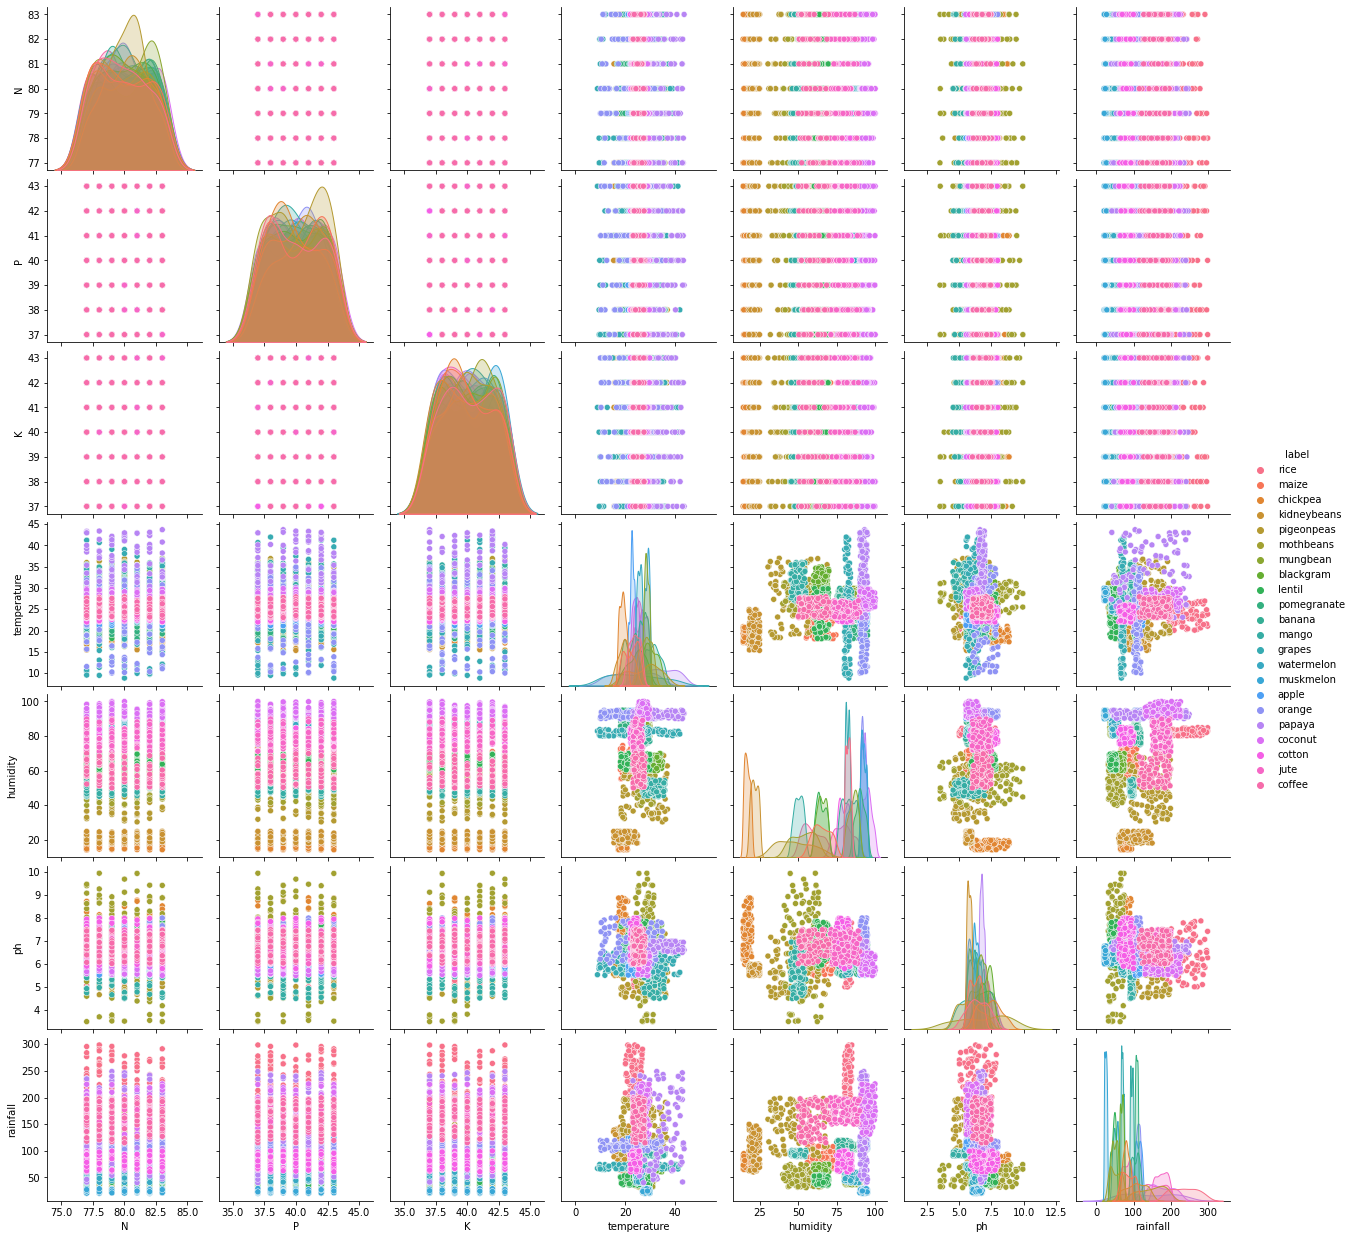

In [12]:
sns.pairplot(df,hue='label')
plt.show()

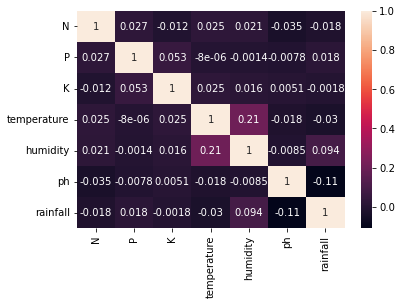

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,0.026839,-0.011825,0.025428,0.021323,-0.034815,-0.017776
P,0.026839,1.000000,0.052974,-0.000008,-0.001350,-0.007788,0.018084
K,-0.011825,0.052974,1.000000,0.025481,0.016211,0.005115,-0.001837
temperature,0.025428,-0.000008,0.025481,1.000000,0.205320,-0.017795,-0.030084
humidity,0.021323,-0.001350,0.016211,0.205320,1.000000,-0.008483,0.094423
ph,-0.034815,-0.007788,0.005115,-0.017795,-0.008483,1.000000,-0.109069
rainfall,-0.017776,0.018084,-0.001837,-0.030084,0.094423,-0.109069,1.000000


In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()
df.corr()

In [20]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['N','P','K','temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  82.72727272727273
              precision    recall  f1-score   support

       apple       0.81      1.00      0.90        13
      banana       0.71      1.00      0.83        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.59      1.00      0.75        22
      cotton       1.00      0.30      0.46        20
      grapes       0.72      1.00      0.84        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      0.95      0.98        21
       mango       0.90      1.00      0.95        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.55      0.41

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [29]:
score

array([0.82727273, 0.82954545, 0.83181818, 0.84090909, 0.83409091])

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       0.87      1.00      0.93        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      0.94      0.97        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.87      0.90      0.88

In [31]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.95681818, 0.94772727, 0.96136364, 0.94545455, 0.95      ])

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [33]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.759090909090909
              precision    recall  f1-score   support

       apple       0.77      0.77      0.77        13
      banana       0.85      1.00      0.92        17
   blackgram       0.64      0.88      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.66      0.90      0.76        21
      coffee       0.81      0.59      0.68        22
      cotton       0.81      0.65      0.72        20
      grapes       0.68      0.72      0.70        18
        jute       0.77      0.82      0.79        28
 kidneybeans       1.00      0.86      0.92        14
      lentil       0.92      1.00      0.96        23
       maize       0.95      0.86      0.90        21
       mango       0.87      1.00      0.93        26
   mothbeans       0.85      0.58      0.69        19
    mungbean       0.87      0.83      0.85        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.44    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

In [ ]:
# import pickle
# # Dump the trained Naive Bayes classifier with Pickle
# LR_pkl_filename = 'LogisticRegression.pkl'
# # Open the file to save as pkl file
# LR_Model_pkl = open(DT_pkl_filename, 'wb')
# pickle.dump(LogReg, LR_Model_pkl)
# # Close the pickle instances
# LR_Model_pkl.close()

In [ ]:
pre = RF.predict(pd.DataFrame({'N':[57,67],'P':[23,56],'K':[20,45],'temperature':[19.43534,23.56755],'humidity':[76.5463,67.85767],'ph':[9.45423,7.564],'rainfall':[200.5345,100.546]}))

In [ ]:
pre

In [ ]:
pre = RF.predict(pd.DataFrame({'N':[45],'P':[28],'K':[50],'temperature':[19.43534],'humidity':[58],'ph':[6.564],'rainfall':[50]}))

In [ ]:
pre